In this assignment we will implement a simple monte carlo method to calculate the value of $\pi$. Obviously we already know the value of $\pi$, but this exercise serves as a nice demonstation. We will draw a unit square, and draw inside it a quarter-circle with radius $r=1$. We will randomly select many points in the unit square (a random point can be selected by choosing a random number between 0 and 1 for the x value, and another random number between 0 and 1 for the y value).

We know that the area of the square is $A_sq = 1$, and the area of the semicircle is $A_sc = \frac{\pi}{4}$ [^1]. Hence the probability of a randomly selected point falling inside the semicircle is $p = \frac{A_sc}{A_sq} = \frac{\frac{\pi}{4}}{1} = \frac{\pi}{4}$. Therefore we can find $\pi$ from this probability: $\pi = 4p$. On the other hand, in a simulation we can choose many points, and compute the probability $p$ as the empirical probability, $p=\frac{\textrm{number of points inside semircle}}{\textrm{total number of points}}$. 

Let's see how this works in practice.

[^1]: (Area of a circle is $A = \pi r^2$, so area of a quarter-circle is $A = \frac{\pi r^2}{4}$. The radius of our quarter-circle is 1)

In the cell below we just plot the quarter-circle. This will be helpful later in visualising our results.

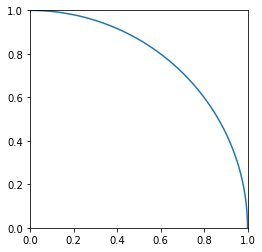

In [12]:
import numpy as np
import matplotlib.pyplot as plt

thetas = np.linspace(0, np.pi/2, 1000)
xs = np.cos(thetas)
ys = np.sin(thetas)

plt.plot(xs, ys)
plt.xlim([0, 1])
plt.ylim([0, 1])
ax = plt.gca()
ax.set_aspect('equal')


We know that we will need random numbers. The function np.random.random() generates uniformly-distributed random numbers in the interval $[0, 1)$. If we call np.random.random(), we'll get a random number. If we call np.random.random(3), we'll get an array of 3 random numbers. Run the cell below and observe that the numbers change each time.

In [69]:
print(np.random.random())
print(np.random.random(3))

0.9716174361902706
[0.47022174 0.61788775 0.50452087]


Now let's pick some random points and plot them alongside the quarter-circle

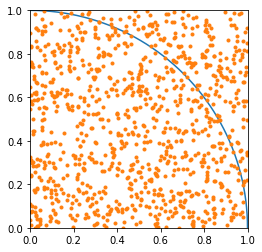

In [71]:
n_points = 1000
xSample = np.random.random(n_points)
ySample = np.random.random(n_points)

plt.plot(xs, ys, xSample, ySample, '.')
plt.xlim([0, 1])
plt.ylim([0, 1])
ax = plt.gca()
ax.set_aspect('equal')

Now we have to decide which points have fallen inside the quarter circle. This is very easy - a point is inside the circle if $x^2+y^2 <1$, keeping in mind that the radius of the circle is 1. As you can see, "accepted" is an array of boolean values that records whether each point was inside the quarter-circle.

In [73]:
n_points = 10
xSample = np.random.random(n_points)
ySample = np.random.random(n_points)
accepted = (xSample**2 + ySample**2 ) < 1
rejected = (xSample**2 + ySample**2 ) >= 1

print(accepted)

[ True False  True False  True  True  True False  True  True]


Let's now plot the points and circle. If you're confused by `xSample[accepted]`, you should review [array indexing in numpy](https://numpy.org/devdocs/reference/arrays.indexing.html)

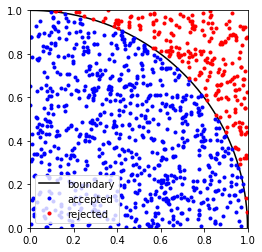

In [79]:
n_points = 1000
xSample = np.random.random(n_points)
ySample = np.random.random(n_points)
accepted = (xSample**2 + ySample**2 ) < 1
rejected = (xSample**2 + ySample**2 ) >= 1

plt.plot(xs, ys,'k', xSample[accepted], ySample[accepted], 'b.', xSample[rejected], ySample[rejected], 'r.',)
plt.xlim([0, 1])
plt.ylim([0, 1])
ax = plt.gca()
ax.set_aspect('equal')
plt.legend(('boundary', 'accepted', 'rejected'))
plt.show()

Now we need to find the empirical probability of a point falling inside the quarter-circle, $p=\frac{\textrm{number of points inside semircle}}{\textrm{total number of points}}$. It's easy to count the number of points inside the circle - `accepted` is an array of boolean values, so `accepted.sum()` will give us the number of `True` values in this array (`True` is treated as 1, and `False` is treated as 0).

Run the code below with increasing values of `n_points` and observe how the computed value of $\pi$ becomes more accurate.

Pi: Guess: 3.0400, True: 3.1416, percentage error: 3.23 % 


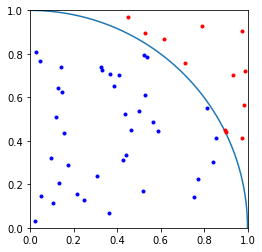

In [104]:
n_points = 50
xSample = np.random.random(n_points)
ySample = np.random.random(n_points)
accepted = (xSample**2 + ySample**2 ) < 1
rejected = (xSample**2 + ySample**2 ) >= 1

plt.plot(xs, ys, xSample[accepted], ySample[accepted], 'b.', xSample[rejected], ySample[rejected], 'r.',)
plt.xlim([0, 1])
plt.ylim([0, 1])
ax = plt.gca()
ax.set_aspect('equal')

# P(accept) = pi*r^2/4
# pi = 2 * sqrt(P(accept))
pAccept = accepted.sum() / n_points

pi_guess = 4*pAccept


print("Pi: Guess: %.4f, True: %.4f, percentage error: %.2f %% " % (pi_guess, np.pi, 100*abs(np.pi-pi_guess)/np.pi))

Once important point about monte-carlo methods. Since we are computing a probability based on random samples, there is an inherent uncertainty - if we used fewer points, then we would be less certain about our calculated value of $\pi$. Statistics tells us that if we used $N$ points, and calculate a true probability $\hat{p}$, then there is a 95% chance that the *true* value of $p$ is between  $ p - 1.96 \sqrt{\frac{p (1 - p)}{N}}$ and  $ p + 1.96 \sqrt{\frac{p (1 - p)}{N}}$. If you want to understand why, you can read [this page](https://openstax.org/books/introductory-business-statistics/pages/8-3-a-confidence-interval-for-a-population-proportion). It makes sense to say that the uncertainty in the value of $p$ is $\Delta p = 1.96 \sqrt{\frac{p (1 - p)}{N}}$. The uncertainty in our value of $\pi_{\textrm{calc}}$ is therefore $\Delta \pi_{\textrm{calc}} = 4 \Delta p$. Let's calculate these and see if our code achieves the expected accuracy.

Run the code below and compare the actual error to the theoretical error. For low values of `n_points`, they can be quite different, but when `n_points` is large, they converge. Notice that as you increase `n_points`, the theoretical error decreases. The theoretical estimate of the error allows us to be precise about the error in our calculated values. 

Pi: Guess: 3.2400, True: 3.1416, percentage error (vs calculated): 3.13 %, percentage error (theoretical): 4.90 %


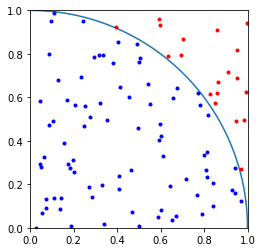

In [130]:
n_points = 100
xSample = np.random.random(n_points)
ySample = np.random.random(n_points)
accepted = (xSample**2 + ySample**2 ) < 1
rejected = (xSample**2 + ySample**2 ) >= 1

plt.plot(xs, ys, xSample[accepted], ySample[accepted], 'b.', xSample[rejected], ySample[rejected], 'r.',)
plt.xlim([0, 1])
plt.ylim([0, 1])
ax = plt.gca()
ax.set_aspect('equal')

# P(accept) = pi*r^2/4
# pi = 2 * sqrt(P(accept))
pAccept = accepted.sum() / n_points

pi_guess = 4*pAccept
pAccept_error = (1.96)*np.sqrt(pAccept*(1-pAccept)/n_points)
pi_guess_error = 4*pAccept_error

print("Pi: Guess: %.4f, True: %.4f, percentage error (vs calculated): %.2f %%, percentage error (theoretical): %.2f %%"\
      % (pi_guess, np.pi, 100*abs(np.pi-pi_guess)/np.pi, 100*0.5*pi_guess_error/np.pi))

# Tasks
1. Adapt my code above to investigate how the calculated value of $\pi$ varies with the number of points. Make a graph of $\pi_{\textrm{calc}}$ against `n_points`. Add to this graph a horizontal line showing the true value of $\pi$, and also plot $\pi_{\textrm{calc}} - \Delta \pi_\textrm{calc}$,  and $\pi_{\textrm{calc}} + \Delta \pi_\textrm{calc}$. 
2. The error function is defined as $\operatorname{erf(z)} = \frac{2}{\pi} \int^{z}_{0} e^{-t^2} dt$. That is, $\frac{2}{\sqrt{\pi}}$ multiplied by the area under the curve $y = e^{-t^2}$ between $t=0$ and $t=z$. This area can be computed using a monte-carlo method. Use such a method to write code to estimate a) $\operatorname{erf}(1)$, b) $operatorname{erf}(2)$. You can check your answers using [this tool](https://keisan.casio.com/exec/system/1180573449).

*Hint*. First realise that the curve $y=e^-t^2$ has a max value of $1$ at $t=0$ (see graph [here](https://www.wolframalpha.com/input/?i=plot%28e%5E-t%5E2%29). Consider a rectangle with one corner at $(0,0)$ and the opposite corner at $(z, 1)$. That is a rectangle with width $z$ and height 1. This rectangle's area is equal to $z$. Now randomly choose points in this rectange, and check if they fall underneath the curve $y=e^{-t^2}$. In this case, the probability of a point falling under the curve is $p = \frac{\textrm{area under the curve } y = e^{-t^2} \textrm{ between } t=0 \textrm{ and } t=z}{\textrm{area of rectangle}} = \frac{\int^{z}_{0} e^{-t^2} dt}{z}$, so from the probability, we can calculate $\int^{z}_{0} e^{-t^2} dt$ and then $\operatorname{erf}(z)$

3. Extend the code from 2. to create a function that computes $\operatorname{erf}(z)$ for *any* value of $z$.
4. Extend the code from 3. to add a feature to the function that allows the user to specify the *maximum* allowed percentage uncertainty in the calculated value of $\operatorname{erf}(z)$. (this will involve changing the number of 

$\textrm{area under the curve } y = e^{-t^2} \textrm{ between } t=0 \textrm{ and } t=z$